In [0]:
!git clone https://github.com/muxspace/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (13996/13996), done.


In [2]:
import csv
data = {}
with open('facial_expressions//data//legend.csv') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[2].lower()
    if key in data:
      data[key].append(row[1])
    else:
      data[key] = [row[1]]

In [3]:
emotion_list = list(data.keys())
emotion_list

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'sadness',
 'contempt']

In [0]:
import os

os.mkdir('master_data')
os.mkdir('master_data/training')
os.mkdir('master_data/testing')

In [0]:
for emotion in emotion_list:
  os.mkdir(os.path.join('master_data/training/', emotion))
  os.mkdir(os.path.join('master_data/testing/', emotion))

In [0]:
from shutil import copyfile
split_size = 0.8

for emotion, images in data.items():
  train_size = int(split_size*len(images))
  train_images = images[:train_size]
  test_images = images[train_size:]
  for image in train_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/training', emotion, image)
    copyfile(source, dest)
  for image in test_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/testing', emotion, image)
    copyfile(source, dest)

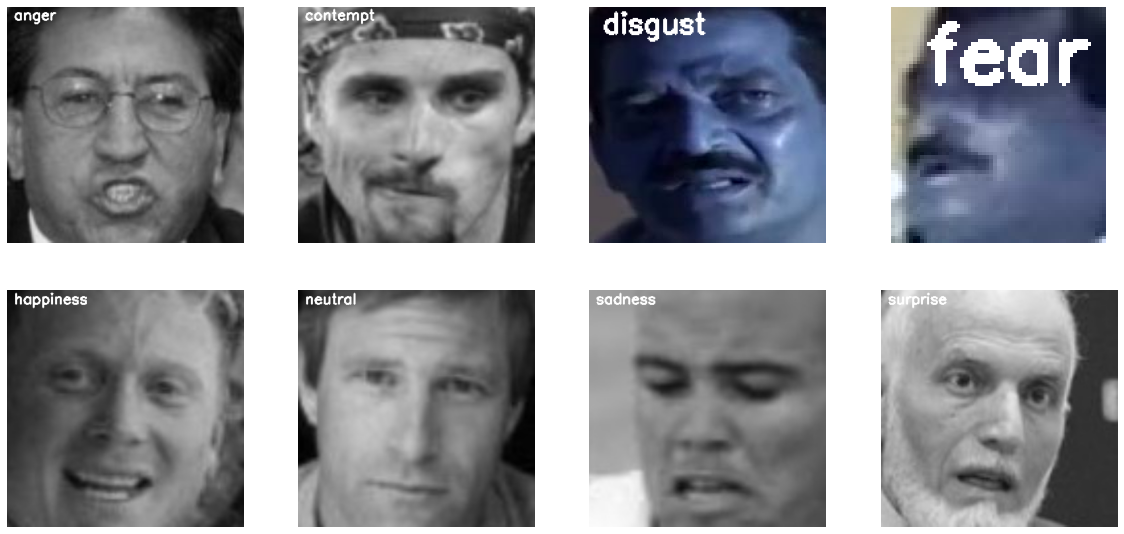

In [21]:
import os
import matplotlib.pyplot as plt
import cv2
path = 'master_data/training/'
plt.figure(figsize = (20, 20))

for k,i in enumerate(os.listdir(path)):
    for j in os.listdir(path+i):
        img_path = path + i+ '/'+j
        img = cv2.imread(img_path)
        cv2.putText(img, i, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        plt.subplot(4, 4,k+1 );plt.imshow(img);plt.axis('off')
        break

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [5]:
model = tf.keras.models.Sequential([
      Conv2D(16, (3,3), activation='relu', input_shape = (100, 100, 3)),
      MaxPooling2D(2, 2),
      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(1024, activation='relu'),
      Dense(8, activation='softmax')
])
model.compile(optimizer = Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

c:\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [6]:
train_dir = 'master_data/training'
test_dir = 'master_data/testing'


train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [9]:
es = EarlyStopping(monitor='val_acc', patience = 9, min_delta=0.01)

In [10]:
model.fit_generator(train_generator,
                    epochs = 20,
                    verbose = 1,
                    validation_data = test_generator,
                    callbacks = [es])

Epoch 1/20
86/86 [==============================] - 228s 3s/step - loss: 0.6499 - acc: 0.7633 - val_loss: 1.3332 - val_acc: 0.5992
Epoch 2/20
86/86 [==============================] - 201s 2s/step - loss: 0.6210 - acc: 0.7763 - val_loss: 1.5205 - val_acc: 0.6058
Epoch 3/20
86/86 [==============================] - 215s 2s/step - loss: 0.5878 - acc: 0.7905 - val_loss: 1.4057 - val_acc: 0.6214
Epoch 4/20
86/86 [==============================] - 207s 2s/step - loss: 0.5684 - acc: 0.7915 - val_loss: 1.4168 - val_acc: 0.6189
Epoch 5/20
86/86 [==============================] - 270s 3s/step - loss: 0.5409 - acc: 0.8056 - val_loss: 1.5425 - val_acc: 0.6364
Epoch 6/20
86/86 [==============================] - 222s 3s/step - loss: 0.5246 - acc: 0.8092 - val_loss: 1.4579 - val_acc: 0.6437
Epoch 7/20
86/86 [==============================] - 331s 4s/step - loss: 0.4897 - acc: 0.8249 - val_loss: 1.5450 - val_acc: 0.6543
Epoch 8/20
86/86 [==============================] - 239s 3s/step - loss: 0.4689 - a

In [13]:
# model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
import datetime as dt

date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
model_file_name = f'Facial_Emotions_Dete_model2___Date_Time_{current_date_time_string}.h5'

# Save the Model.
model.save(model_file_name)

In [16]:
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

{0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happiness', 5: 'neutral', 6: 'sadness', 7: 'surprise'}


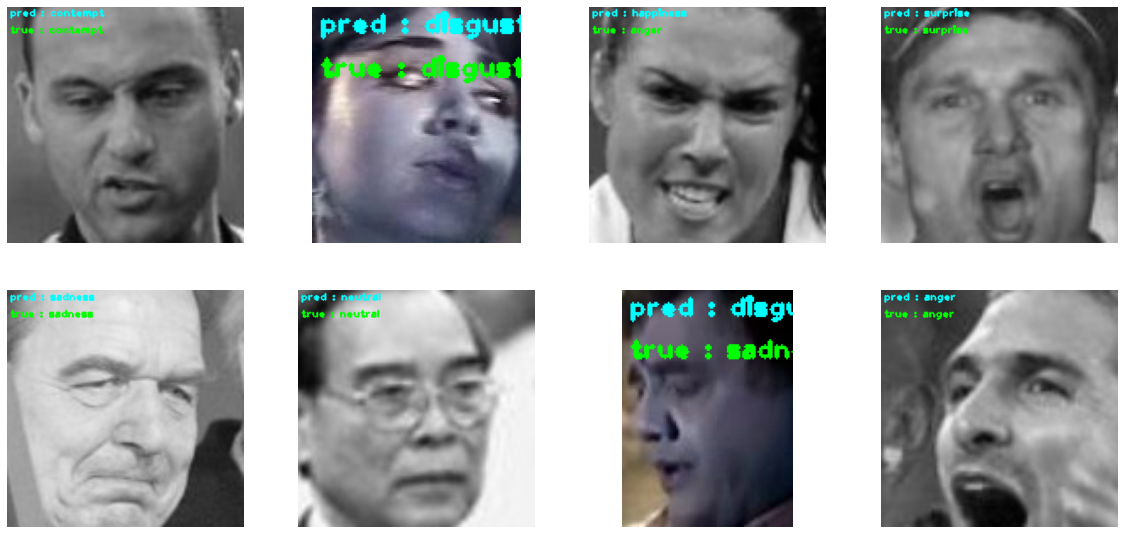

In [20]:
import cv2
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import cv2

def get_prediction():
    path = 'master_data/test/'
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    img_final_path = file_path + "/" + image_name

    true_label = path_class
    img = cv2.imread(img_final_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (100, 100))  # Resize the image to match the expected input size of the model
    img = img / 255.0  # Normalize the pixel values (optional)

    # Reshape the image to match the expected input shape of the model
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)[0]
    predicted_label = np.argmax(predictions)

    # Get the class name using the retrieved index.
    # predicted_class_name = CLASSES_LIST[predicted_label]
    pred= class_labels[predicted_label]
    return pred,img_final_path,true_label


def draw_test(name, pred, im, true_label,index):
    
#     BLACK = [0,0,0]
#     expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
#     cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
#     cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
#     cv2.imshow(name, expanded_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

    height, width, _ = im.shape
    
    text1 = "pred : "+ pred
    text2 = "true : "+true_label
    
    cv2.putText(img, text1, (4, 15) ,cv2.FONT_HERSHEY_PLAIN,1, (0,255,255), 2)
    cv2.putText(img, text2, (4, 40) ,cv2.FONT_HERSHEY_PLAIN,1, (0,255,0), 2)
    plt.subplot(4,4 ,index );plt.imshow(im);plt.axis('off')

# img = cv2.imread(img_final_path)
# draw_test('img',pred,img,true_label)

plt.figure(figsize=(20,20))
for i in range(1,9):
    pred,img_final_path,true_label =  get_prediction()
    img = cv2.imread(img_final_path)
    draw_test('img',pred,img,true_label,i)